In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Загрузка датафрейма

In [2]:
df = pd.read_csv('Downloads/ha_data.csv', sep=';')
df.head(15)

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
5,NaN,18.0,sneakers,desktop,2017-01-11 09:22:12,banner_show,user_2
6,NaN,18.0,sneakers,desktop,2017-01-11 09:24:43,banner_click,user_2
7,NaN,26.0,sneakers,desktop,2017-01-09 09:38:51,banner_show,user_3
8,NaN,2004233.0,sports_nutrition,desktop,2017-01-09 09:12:45,banner_show,user_3
9,NaN,6323332.0,company,desktop,2017-01-03 08:58:18,banner_show,user_3


In [3]:
# проверка пропусков
df.isna().sum()

order_id        8222504
page_id          248722
product               0
site_version          0
time                  0
title                 0
user                  0
dtype: int64

In [4]:
# пропусков нет, смотрим типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   order_id      float64
 1   page_id       float64
 2   product       object 
 3   site_version  object 
 4   time          object 
 5   title         object 
 6   user          object 
dtypes: float64(2), object(5)
memory usage: 452.4+ MB


In [5]:
# преобразуем время в формат даты
df.loc[:, 'time'] = pd.to_datetime(df['time'])

In [7]:
# изучение поведения случайного пользователя
df[df.user=='user_1001115'].sort_values('time')

,order_id,page_id,product,site_version,time,title,user
2286949,NaN,18873573.0,company,desktop,2017-02-23 21:55:07,banner_show,user_1001115
2286948,NaN,5256175.0,clothes,desktop,2017-02-25 00:35:31,banner_show,user_1001115
2286951,NaN,5256175.0,clothes,desktop,2017-02-25 00:37:23,banner_click,user_1001115
2286950,NaN,18878613.0,accessories,desktop,2017-03-06 11:29:25,banner_show,user_1001115
2286952,465294.0,NaN,clothes,desktop,2017-03-22 05:14:11,order,user_1001115


# Конверсия из показа баннера в клик на баннер

In [11]:
print(f'общая конверсия по категориям в %')
df[df.title=='banner_click'].groupby(['product']).page_id.count() / \
df[df.title=='banner_show'].groupby(['product']).page_id.count() * 100

общая конверсия по категориям в %


product
accessories          9.455819
clothes             15.180700
company              9.164506
sneakers            12.566645
sports_nutrition     9.885468
Name: page_id, dtype: float64

In [14]:
print(f'общая конверсия по версиям сайта в %')
df[df.title=='banner_click'].groupby(['site_version']).page_id.count() / \
df[df.title=='banner_show'].groupby(['site_version']).page_id.count() * 100

общая конверсия по версиям сайта в %


site_version
desktop     5.390370
mobile     13.579836
Name: page_id, dtype: float64

In [12]:
# конверсия по категориям и версиям сайта
conv = df[df.title=='banner_click'].groupby(['product','site_version']).page_id.count() / \
df[df.title=='banner_show'].groupby(['product','site_version']).page_id.count() * 100
conv.reset_index().pivot(index='site_version',columns='product')

page_id                                                  
product      accessories    clothes    company   sneakers sports_nutrition
site_version                                                              
desktop         4.519723   7.841031   5.962621   5.203864         3.321400
mobile         11.418874  18.145263  10.550440  15.476589        12.500107

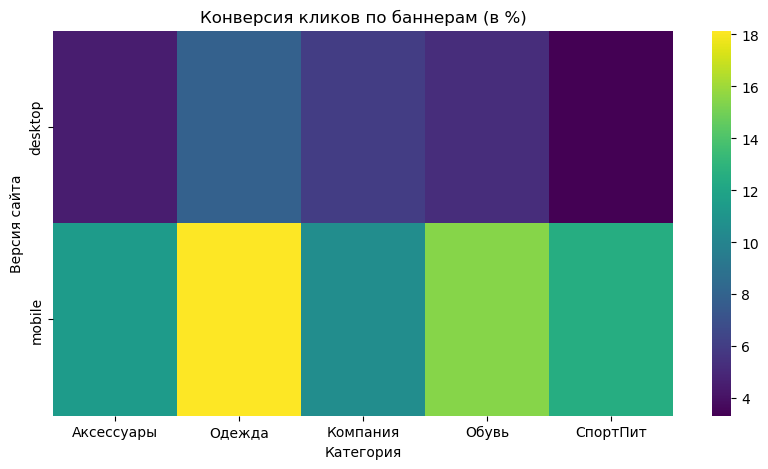

In [13]:
# представим на графике
plt.figure(figsize=(10,5))
sns.heatmap(data=conv.reset_index().pivot(index='site_version',columns='product'),
           cmap='viridis',xticklabels=['Аксессуары',"Одежда","Компания","Обувь","СпортПит"])
plt.xlabel('Категория')
plt.ylabel('Версия сайта')
plt.title('Конверсия кликов по баннерам (в %)');

Видно, что конверсия баннеров в мобильной версии сайта в целом выше чем на версии для ПК, а также заметно явное лидерство категории Одежда. \
Однако у разных версий сайта разные лидирующие и отстающие категории. Например, Спортивное питание имеет самую низкую конверсию на ПК, но в мобильной версии показывает себя относительно неплохо

# Конверсия из кликов по баннеру в покупку

In [15]:
dfSorted = df.sort_values(by=['user','time'])

In [16]:
# списки заказов после кликов по баннерам
orderCR = dfSorted[(dfSorted['title']=='order')&
                   (dfSorted.groupby('user')['title'].shift(1) == 'banner_click')&
                  (dfSorted.groupby('user')['product'].shift(1) == dfSorted['product'])]
companyCR = dfSorted[(dfSorted['title']=='order')& 
                    (dfSorted.groupby('user')['title'].shift(1) == 'banner_click')&
                    (dfSorted.groupby('user')['product'].shift(1) == 'company')]

In [17]:
# подсчет разницы дней между кликом и заказом
companyCR['timediff'] = (companyCR.loc[:, 'time'] - dfSorted.groupby('user')['time'].shift(1)).dt.days
orderCR['timediff'] = (orderCR.loc[:, 'time'] - dfSorted.groupby('user')['time'].shift(1)).dt.days

C:\Users\1\AppData\Local\Temp\ipykernel_22284\983162118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyCR['timediff'] = (companyCR.loc[:, 'time'] - dfSorted.groupby('user')['time'].shift(1)).dt.days
C:\Users\1\AppData\Local\Temp\ipykernel_22284\983162118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderCR['timediff'] = (orderCR.loc[:, 'time'] - dfSorted.groupby('user')['time'].shift(1)).dt.days


In [53]:
orderCR.timediff.describe(percentiles = [0.75, 0.95, 0.99])

count    8476.000000
mean       12.433931
std         9.943095
min         0.000000
50%        11.000000
75%        19.250000
95%        28.000000
99%        30.000000
max       110.000000
Name: timediff, dtype: float64

In [51]:
companyCR.timediff.describe(percentiles = [0.75, 0.95, 0.99])

count    9035.000000
mean       12.817266
std        10.047900
min         0.000000
50%        11.000000
75%        20.000000
95%        28.300000
99%        30.000000
max       122.000000
Name: timediff, dtype: float64

Заметим, что половина людей соврешали покупку только после 11 дней после клика на баннер. А 99% покупателей хватило 30 дней на раздумья о покупке. Так как упор в расчетах идет на среднестатистического пользователя сайта, ограничим эти данные 30 днями(99%)

In [56]:
orderCR = orderCR[orderCR.timediff <= 30]
companyCR = orderCR[orderCR.timediff <= 30]

## Конверсия баннеров компании

In [90]:
# общая конверсия вместе с компанией в %
companyCR.groupby('site_version').order_id.count() / \
df[(df['product'] == 'company')&(df['title']=='banner_click')].groupby('site_version').page_id.count() * 100

site_version
desktop    10.806633
mobile      4.588465
dtype: float64

In [139]:
# Для компании посмотрим относительные значения продаж
companyCR[['site_version', 'product']].value_counts(normalize=True).sort_index()

site_version  product         
desktop       accessories         0.051931
              clothes             0.210933
              sneakers            0.080452
              sports_nutrition    0.022222
mobile        accessories         0.100178
              clothes             0.281759
              sneakers            0.193345
              sports_nutrition    0.059180
Name: proportion, dtype: float64

In [113]:
# конверсия ПК
companyCR['product'].value_counts(normalize=True) * 10.806633

product
clothes             5.324338
sneakers            2.958821
accessories         1.643790
sports_nutrition    0.879684
Name: proportion, dtype: float64

In [107]:
# конверсия мобильная 
companyCR['product'].value_counts(normalize=True) * 4.588465

product
clothes             2.260698
sneakers            1.256307
accessories         0.697948
sports_nutrition    0.373511
Name: proportion, dtype: float64

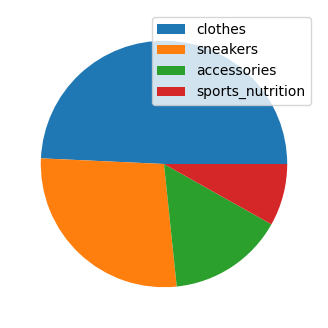

In [80]:
plt.figure(figsize=(4,4))
plt.pie(companyCR['product'].value_counts(normalize=True))
plt.legend(companyCR['product'].unique());

## Конверсия баннеров по категориям

In [131]:
orderCR.groupby(['site_version']).order_id.count() / \
df[(df['product'] != 'company')&(df['title']=='banner_click')].groupby(['site_version']).page_id.count() * 100

site_version
desktop    3.551922
mobile     0.893163
dtype: float64

In [100]:
orderCR.groupby(['product','site_version']).order_id.count() / \
df[(df['product'] != 'company')&(df['title']=='banner_click')].groupby(['product','site_version']).page_id.count() * 100

product           site_version
accessories       desktop         2.358211
                  mobile          0.716088
clothes           desktop         5.414722
                  mobile          1.262419
sneakers          desktop         3.160745
                  mobile          1.009443
sports_nutrition  desktop         1.348234
                  mobile          0.380013
dtype: float64

# Доля заказов по баннерам от общего числа заказов

In [119]:
pd.concat([orderCR, companyCR]).order_id.count() / df.order_id.count() * 100

6.76659081223213

In [125]:
# доля от заказов в категории
pd.concat([orderCR, companyCR]).groupby('product').order_id.count() / df.groupby('product').order_id.count() * 100

product
accessories         5.746223
clothes             7.356607
company                  NaN
sneakers            6.804590
sports_nutrition    5.771580
Name: order_id, dtype: float64

In [128]:
# доля от заказов в версии сайта
pd.concat([orderCR, companyCR]).groupby('site_version').order_id.count() / df.groupby('site_version').order_id.count() * 100

site_version
desktop    4.619278
mobile     9.241741
Name: order_id, dtype: float64

In [129]:
#  доля заказов в разрезе категория + версия сайта
pd.concat([orderCR, companyCR]).groupby(['product','site_version']).order_id.count() / df.groupby(['product','site_version']).order_id.count() * 100

product           site_version
accessories       desktop          3.950997
                  mobile           7.516719
clothes           desktop          5.300327
                  mobile          10.367747
company           desktop               NaN
                  mobile                NaN
sneakers          desktop          4.157838
                  mobile           9.256415
sports_nutrition  desktop          3.247092
                  mobile           8.151240
Name: order_id, dtype: float64

# Выводы

К сожалению, нет данных о суммах заказов, которые позволили бы оценить текущие CPC каждого баннера и сделать более точные выводы с получением цены, за которую мы готовы продать рекламное место

Конверсия из показа в клик:
На мобильной версии сайта баннеры показывают значительно большую эффективность. Например:
Для одежды конверсия составляет 18.15% на мобильной версии против 7.84% на десктопе.
Для кроссовок конверсия на мобильных устройствах составляет 15.48% против 5.20% на десктопе.
Это говорит о том, что пользователи на мобильных устройствах активнее взаимодействуют с баннерами, независимо от типа продукта.

Конверсия из клика в заказ:
Важно отметить, что конверсия по баннерам, рекламирующим саму компанию, выше на десктопе (10.81%) по сравнению с мобильной версией (4.59%).
Для продуктовых баннеров общая конверсия на десктопе составляет 3.55%, а на мобильных — 0.89%, что говорит о лучшей результативности десктопных баннеров в преобразовании кликов в заказы.

Конверсия по продуктам и устройствам:
Результаты баннеров компании и баннеров продукции в разрезе товарных групп и устройств примерно равны

Доля заказов по баннерам от общего числа заказов:
Баннеры на мобильных устройствах генерируют больший процент заказов, особенно для таких категорий, как:
Одежда: на мобильной версии 10.37% заказов происходит через баннеры против 5.30% на десктопе.
Кроссовки: 9.26% на мобильных устройствах и 4.16% на десктопе.
Это подтверждает, что мобильные баннеры стимулируют значительную долю продаж, несмотря на более низкую конверсию из кликов в заказы.

Рекомендации:

Продажа баннерного места в некоторых категориях:
Учитывая, что баннеры на мобильной версии приносят существенный вклад в продажи (особенно в категориях "одежда" и "кроссовки"), продавать это место для рекламы другого сервиса может привести к потере части дохода. Лучше сохранить баннеры для продуктов с высокой конверсией и долей заказов.
На десктопе можно рассмотреть продажу баннерного места для категории "компания" или менее эффективных баннеров с низкой долей заказов.
Можно продавать рекламное место для менее эффективных баннеров (например, десктопные версии для спортивного питания или "компании")
Таким образом, лучше удержать высокоэффективные мобильные баннеры, особенно для категорий одежды и кроссовок, а баннерное место на десктопе для менее эффективных категорий можно продавать по модели CPC.